• DOMAIN: Smartphone, Electronics

• CONTEXT: India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

• DATA DESCRIPTION: 

• author : name of the person who gave the rating

• country : country the person who gave the rating belongs to

• data : date of the rating

• domain: website from which the rating was taken from

• extract: rating content

• language: language in which the rating was given

• product: name of the product/mobile phone for which the rating was given

• score: average rating for the phone

• score_max: highest rating given for the phone

• source: source from where the rating was taken

• PROJECT OBJECTIVE: We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively

1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

A. Merge all the provided CSVs into one data-frame.

B. Explore, understand the Data and share at least 2 observations.

C. Round off scores to the nearest integers.

D. Check for missing values. Impute the missing values, if any.

E. Check for duplicate values and remove them, if any.

F. Keep only 1 Million data samples. Use random state=612.

G. Drop irrelevant features. Keep features like Author, Product, and Score.

In [1]:
# 1. Import the necessary libraries and read the provided CSVs 
# as a data frame and perform the below steps.

# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# Suppressing warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading Data Files
rev1 = pd.read_csv('phone_user_review_file_1.csv', encoding='iso-8859-1')
rev2 = pd.read_csv('phone_user_review_file_2.csv', encoding='iso-8859-1')
rev3 = pd.read_csv('phone_user_review_file_3.csv', encoding='iso-8859-1')
rev4 = pd.read_csv('phone_user_review_file_4.csv', encoding='iso-8859-1')
rev5 = pd.read_csv('phone_user_review_file_5.csv', encoding='iso-8859-1')
rev6 = pd.read_csv('phone_user_review_file_6.csv', encoding='iso-8859-1')

In [3]:
# top 5 rows of the dataset1
rev1.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/
date,5/2/2017,4/28/2017,5/4/2017,5/2/2017,5/11/2017
lang,en,en,en,en,en
country,us,us,us,us,us
source,Verizon Wireless,Phone Arena,Amazon,Samsung,Verizon Wireless
domain,verizonwireless.com,phonearena.com,amazon.com,samsung.com,verizonwireless.com
score,10.0,10.0,6.0,9.2,4.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,As a diehard Samsung fan who has had every Sam...,Love the phone. the phone is sleek and smooth ...,Adequate feel. Nice heft. Processor's still sl...,Never disappointed. One of the reasons I've be...,I've now found that i'm in a group of people t...
author,CarolAnn35,james0923,R. Craig,Buster2020,S Ate Mine


In [4]:
# top 5 rows of the dataset2
rev2.head().T

,0,1,2,3,4
phone_url,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/
date,4/15/2015,5/23/2015,4/27/2015,4/22/2015,4/18/2015
lang,en,en,en,en,en
country,us,gb,gb,gb,gb
source,Amazon,Amazon,Amazon,Amazon,Amazon
domain,amazon.com,amazon.co.uk,amazon.co.uk,amazon.co.uk,amazon.co.uk
score,2.0,10.0,8.0,10.0,10.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,"The telephone headset is of poor quality , not...",This is my first smartphone so I have nothing ...,Great phone. Battery life not great but seems ...,Best 90 quid I've ever spent on a smart phone,I m happy with this phone.it s very good.thx team
author,luis,Mark Lavin,tracey,Reuben Ingram,viorel


In [5]:
# top 5 rows of the dataset3
rev3.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/
date,11/7/2015,10/2/2015,9/2/2015,9/2/2015,9/1/2015
lang,pt,pt,pt,pt,pt
country,br,br,br,br,br
source,Submarino,Submarino,Submarino,Submarino,Colombo
domain,submarino.com.br,submarino.com.br,submarino.com.br,submarino.com.br,colombo.com.br
score,6.0,10.0,10.0,8.0,8.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,"recomendo, eu comprei um, a um ano, e agora co...",Comprei um pouco desconfiada do site e do celu...,"Muito bom o produto, obvio que tem versÃµes me...",Unica ressalva fica para a camera que poderia ...,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...
author,herlington tesch,Luisa Silva Marieta,Cyrus,Marcela Santa Clara Brito,Claudine Maria Kuhn Walendorff


In [6]:
# top 5 rows of the dataset4
rev4.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/
date,3/11/2015,17/11/2015,29/10/2015,29/10/2015,29/10/2015
lang,en,en,en,en,en
country,us,in,in,in,in
source,Amazon,Zopper,Amazon,Amazon,Amazon
domain,amazon.com,zopper.com,amazon.in,amazon.in,amazon.in
score,2.0,10.0,4.0,6.0,10.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,was not conpatable with my phone as stated. I ...,Decent Functions and Easy to Operate Pros:- Th...,Not Good Phone such price. Hang too much and v...,not bad for features,Excellent product
author,Frances DeSimone,Expert Review,Amazon Customer,Amazon Customer,NHK


In [7]:
# top 5 rows of the dataset5
rev5.head().T

,0,1,2,3,4
phone_url,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/
date,7/13/2016,7/13/2016,7/13/2016,4/25/2014,4/23/2013
lang,en,en,en,en,en
country,in,in,in,in,in
source,91 Mobiles,91 Mobiles,91 Mobiles,Naaptol,Naaptol
domain,91mobiles.com,91mobiles.com,91mobiles.com,naaptol.com,naaptol.com
score,2.0,6.0,4.0,10.0,10.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,I bought 1 month before. currently speaker is ...,"I just bought one week back, I have Airtel con...",one problem in this handset opera is not worki...,here Karbonn comes up with an another excellen...,"What a phone, all so on Naaptol my god 23% off..."
author,venkatesh,Venkat,krrish,BRIJESH CHAUHAN,Suraj CHAUHAN


In [8]:
# top 5 rows of the dataset6
rev6.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/
date,9/16/2011,2/13/2014,12/30/2011,10/18/2008,9/6/2008
lang,en,en,en,en,en
country,us,us,us,us,us
source,Phone Arena,Amazon,Phone Scoop,HandCellPhone,Reviewed.com
domain,phonearena.com,amazon.com,phonescoop.com,handcellphone.com,reviewed.com
score,8.0,6.0,9.0,4.0,6.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,I've had the phone for awhile and it's a prett...,to be clear it is not the sellers fault that t...,Well i love this phone. i have had ton of phon...,I have had my Instinct for several months now ...,i have had this instinct phone for about two m...
author,ajabrams95,Stephanie,snickers,A4C,betaBgood


In [9]:
data_sets = [rev1, rev2, rev3, rev4, rev5, rev6]
i = 1

for dataset in data_sets:
    print(f"The Shape of dataset 'rev{i}' is :", dataset.shape)
    i +=1

The Shape of dataset 'rev1' is : (374910, 11)
The Shape of dataset 'rev2' is : (114925, 11)
The Shape of dataset 'rev3' is : (312961, 11)
The Shape of dataset 'rev4' is : (98284, 11)
The Shape of dataset 'rev5' is : (350216, 11)
The Shape of dataset 'rev6' is : (163837, 11)


In [10]:
# Q1 A - Merge all the provided CSVs into one data-frame.
rev_all = pd.concat(data_sets) # data_sets inclused all the 06 datasets

In [11]:
rev_copy = rev_all.copy()

In [12]:
# to check the attribute datatypes in the dataset
rev_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


Except two columns i.e. score and score_max, which are of float datatype, all are of object datatype.

In [13]:
# Q1 B - Explore, understand the Data and share at least 2 observations.
# to check the shape of the merged dataset
rev_all.shape

(1415133, 11)

In [14]:
# to check the five point summary
rev_all.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


The mean and standard deviation of score attribute is approx. 08 and 2.6 respectively.

In [15]:
# check for missing values
rev_all.isnull().values.any() # True refers that there are null values

True

In [16]:
# to know the number of null values in each attribute in merged dataset
rev_all.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

There are null values present in 5 attributes i.e. score, score_max, extract, author and product.
The first two attributes are of float datatype whereas the remaining three are of object datatype.

In [17]:
# Q1 D - Check for missing values. Impute the missing values, if any.
# fill the null values

rev_all = rev_all.fillna(rev_all.median())

# dropping the null values 
rev_all = rev_all.dropna()

In [18]:
# Q1 C - Round off scores to the nearest integers.
rev_all['score'] = rev_all['score'].astype(int)
rev_all['score_max'] = rev_all['score_max'].astype(int)

In [19]:
# to check the shape of the merged dataset after replacing null values
rev_all.shape

(1336416, 11)

In [20]:
# Q1 E - Check for duplicate values and remove them, if any.
rev_dup = rev_all.drop_duplicates()

In [21]:
# Q1 G - Drop irrelevant features. Keep features like Author, Product, and Score.
# we can drop phone_url,date,lang,country,
# source,domain, score_max and extract since they do not contribute 
# in deciding popularity.

rev_dup.drop(['phone_url','date', 'lang', 'country', 'source', 'domain', 'score_max', \
              'extract'], axis = 1, inplace = True)

In [22]:
rev_vs = rev_dup.copy()

In [23]:
rev_dup.shape

(1331600, 3)

In [24]:
# Q1 F - Keep only 1 Million data samples. Use random state=612.
df = rev_dup.sample(n=1000000, random_state=612)

In [25]:
# Q2 A - Identify the most rated features.
# sorting the products with highest mean score
df.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
Smartphone Sony Xperia E1 Desbloqueado Vivo Android 4.3 Tela 4 4GB 3G Wi-Fi CÃ¢mera 3MP - Branco                     10.0
Samsung Smartphone Samsung Galaxy S5 Desbloqueado Branco Android 4.4.2 4G CÃ¢mera 16 MP MemÃ³ria Interna 16 GB       10.0
Samsung Smartphone Samsung Galaxy S5 Duos Desbloqueado/ Dual Chip / Branco / 4G / 16 MP / Android 4.4                10.0
Samsung Smartphone Samsung Galaxy S5 Desbloqueado/ Branco / 4G / 16 MP / Android 4.4.2 / 16 GB / USB 3.0             10.0
Samsung Smartphone Samsung Galaxy S5 Desbloqueado Vivo Preto Android 4.4.2 4G CÃ¢mera 16 MP MemÃ³ria Interna 16GB    10.0
Name: score, dtype: float64

In [26]:
# Q2 B - Identify the users with most number of reviews.
(df['author'].value_counts()).head()

Amazon Customer    57765
Cliente Amazon     14564
e-bit               6309
Client d'Amazon     5720
Amazon Kunde        3624
Name: author, dtype: int64

In [27]:
# the product that got most number of reviews
df['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     3908
Lenovo Vibe K4 Note (Black, 16GB)    3234
OnePlus 3 (Graphite, 64 GB)          3128
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

In [28]:
# extracting authors who gave greater than 50 ratings
df1 = pd.DataFrame(columns=['author', 'a_count'])
df1['author'] = df['author'].value_counts().index.tolist()
df1['a_count'] = list(df['author'].value_counts() > 50)

In [29]:
# get names of indexes for which count column is False
index_names = df1[df1['a_count'] == False].index

# drop these row indexes from dataframe
df1.drop(index_names, inplace = True)
df1

,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
674,Rohit,True
675,mircan,True
676,Rose,True
677,Dominik,True


In [30]:
# extracting product that got more than 50 ratings

df2 = pd.DataFrame(columns = ['product', 'p_count'])
df2['product'] = df['product'].value_counts().tolist()
df2['p_count'] = list(df['product'].value_counts() > 50)

In [31]:
# get names of indexes for which count column value is False
index_names = df2[df2['p_count'] == False].index

# drop these row indexes from dataframe
df2.drop(index_names, inplace = True)

df2

,product,p_count
0,3908,True
1,3234,True
2,3128,True
3,2643,True
4,1994,True
...,...,...
4341,51,True
4342,51,True
4343,51,True
4344,51,True


In [32]:
# selecting data rows where product is having more than 50 ratings
df3 = df[df['product'].isin(df2['product'])]
df3

,score,author,product


In [33]:
# Q2 C - Select the data with products having more than 50 ratings 
# and users who have given more than 50 ratings. 
# Report the shape of the final dataset.

df4 = df3[df3['author'].isin(df1['author'])]
df4

,score,author,product


In [34]:
# shape of the final dataset
df4.shape

(0, 3)

## Q3 - Build a popularity based model and recommend top 5 mobile phones.

In [35]:
# calculating the mean score for a product by grouping it
ratings_mean_count = pd.DataFrame(df.groupby('product')['score'].mean())

In [36]:
# calculating the number of ratings a product has got
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('product')['score'].count())

In [37]:
# Recommending the 5 mobile phones based on highest mean score and 
# highest number of ratings the product got.

ratings_mean_count.sort_values(by=['score', 'rating_counts'], ascending=[False,False]).head()

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,144
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,132
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,131
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,127
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,126


In [38]:
data_pb = df
df

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
109329,10,Pankaj Bhalla,"Lenovo P780 (Deep Black, 4GB)"
64164,6,Bgrazina,Samsung Galaxy XCover 2
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
...,...,...,...
70406,4,Dudls,Nokia 301 Dual
16189,8,Cintaaa__,LG Viewty KU990
99081,10,ALBERT M. MASSILLON,BLU Dash JR K Smartphone - Unlocked - Black
102484,2,Amazon Customer,Samsung Galaxy S6 SM-G920F 32GB (FACTORY UNLOC...


## Q4 - Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch.

In [39]:
# arranging columns in the order of user id, item id and rating to be fed in the SVD
columns_titles = ['author', 'product', 'score']
vs_rev = rev_vs.reindex(columns=columns_titles)

In [40]:
# keep only 5000 data samples, Use random state = 612

vs_data = vs_rev.sample(n=5000, random_state = 612)


In [41]:
# Build a collaborative filtering model using SVD.
reader = Reader(rating_scale=(1,10))
data = Dataset.load_from_df(vs_data, reader = reader)

In [42]:
trainset = data.build_full_trainset()

In [43]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 10.0)],
             2: [(2, 10.0)],
             3: [(3, 6.0)],
             4: [(4, 2.0)],
             5: [(5, 10.0)],
             6: [(6, 10.0), (1363, 10.0)],
             7: [(7, 10.0)],
             8: [(8, 8.0), (465, 9.0)],
             9: [(9, 8.0)],
             10: [(10, 10.0)],
             11: [(11, 2.0)],
             12: [(12, 8.0)],
             13: [(13, 8.0)],
             14: [(14, 10.0)],
             15: [(15, 10.0)],
             16: [(16, 2.0)],
             17: [(17, 8.0)],
             18: [(18, 10.0)],
             19: [(19, 9.0)],
             20: [(20, 8.0)],
             21: [(21, 10.0),
              (909, 9.0),
              (2202, 6.0),
              (2551, 10.0),
              (3378, 9.0),
              (3614, 10.0)],
             22: [(22, 2.0)],
             23: [(23, 10.0)],
             24: [(24, 8.0)],
             25: [(25, 10.0)],
             26: [(26, 10.0)],
             27:

In [44]:
algo = SVD()
algo.fit(trainset)

In [45]:
# predict ratings for all pairs(u, i) that are NOT in the training set
testset = trainset.build_anti_testset()

In [46]:
predictions = algo.test(testset)

In [47]:
predictions

[Prediction(uid='Paul B', iid='Blu Win JR LTE (Grey, 4GB)', r_ui=8.0086, est=8.390306951972468, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Lenovo P780 (Deep Black, 4GB)', r_ui=8.0086, est=8.34972437825245, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung Galaxy XCover 2', r_ui=8.0086, est=8.099637294161006, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold', r_ui=8.0086, est=8.17837017506828, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung S3350 Chat 335 Sim Free Mobile Phone', r_ui=8.0086, est=8.213340409987044, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung E1190 Handy (3,6 cm (1,43 Zoll) Display, Dual-Band) titan gray', r_ui=8.0086, est=8.357648744365598, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='LG Nexus 4 Smartphone, Nero [Italia]', r_ui=8.0086, est=8.704362568272723, deta

Above are the predicted items and their estimated ratings for test user

In [52]:
def get_top_n(predictions, n = 5):
    # First map the predictions to each other
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    # then sort the predictions for each user and retrieve the k highest ones
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
    
    return top_n
    

In [53]:
# 8. Try and recommend top 5 products for test users
top_n = get_top_n(predictions, n=5)

In [54]:
top_n

defaultdict(list,
            {'Paul B': [('OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)',
               8.957837285730161),
              ('Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)',
               8.957631933209289),
              ('Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco',
               8.894732860297653),
              ('Samsung Galaxy Express I8730', 8.883985243510091),
              ('Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]',
               8.849578829671874)],
             'Yuvraj': [('Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco',
               9.027264077123787),
              ('OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)',
               8.943828826606968)

Above are the top 5 predicted items and their ratings for test users

In [56]:
# print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Paul B ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Samsung Galaxy Express I8730', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]']
Yuvraj ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'OnePlus 3 (Graphite, 64 GB)', 'Samsung Galaxy S7 32GB (T-Mobile)']
Pankaj Bhalla ['Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Huawei Honor 8 32GB', 'HTC Desire']
Bgra

christopher nagle ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)']
ryde2008 ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 'S

Ernesto Lopez ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (AT&T)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco']
Altmann ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus One (Sandstone Black, 64GB)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S6 32GB (Verizon)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)']
asd ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, And

yaÅar KARAAÄAÃ ['Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3 (Graphite, 64 GB)', 'HTC Desire']
merseburger ['Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]']
anthony hibbert ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP

Flo ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]']
A. Heil ['OnePlus 3 (Graphite, 64 GB)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Displa

maurice ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 'Nokia C2-01 Sim Free Mobile Phone 3G - Black']
ET_ ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S6 zwart / 32 GB']
Bittner Robert ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 M

In [57]:
# Q5 - Evaluate the collaborative model. Print RMSE value.

print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose = True)


SVD Model : Test Set
RMSE: 0.3370


0.33700571440588295

In [58]:
cross_validate(algo, data, measures = ['RMSE'], cv = 3, verbose=False)

{'test_rmse': array([2.60934116, 2.5667721 , 2.57161463]),
 'fit_time': (0.43303656578063965, 0.41547513008117676, 0.43582916259765625),
 'test_time': (0.028462648391723633,
  0.028657913208007812,
  0.020673513412475586)}

RMSE of SVD model is lower than for cross validation.

In [60]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args:
        uid: the id of the user
    returns:
        the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
        iid: the raw id of the item
    returns:
        the number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
bf = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
bf['Iu'] = bf.uid.apply(get_Iu)
bf["Ui"] = bf.iid.apply(get_Ui)
bf['err'] = abs(bf.est - bf.rui)
best_predictions = bf.sort_values(by='err')[:10]
worst_predictions = bf.sort_values(by='err')[-10:]

In [61]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
11367162,mirex08,Sony XPERIA Xperia M2 8GB,8.0086,8.0086,{'was_impossible': False},1,1,3.199185e-08
2072674,LINO20102010,Samsung Galaxy Grand Max,8.0086,8.0086,{'was_impossible': False},1,1,7.164238e-08
3120239,Momo,Motorola KRZR K1,8.0086,8.0086,{'was_impossible': False},1,1,9.261030e-08
1470470,this phood very beautiful its,Samsung GT E1200,8.0086,8.0086,{'was_impossible': False},1,1,9.318273e-08
15476286,Antonio Diez,HTC Sensation,8.0086,8.0086,{'was_impossible': False},1,3,1.029909e-07
5016852,arkedgrafica,Samsung Galaxy S6 Edge G925a 64GB Unlocked GSM...,8.0086,8.0086,{'was_impossible': False},1,1,1.052282e-07
5551757,Dasha Bueva,Samsung I560 Cep Telefonu,8.0086,8.0086,{'was_impossible': False},1,1,1.478067e-07
4462873,bg,Nokia Lumia 1520 GSM unlocked 16GB Windows 8 S...,8.0086,8.0086,{'was_impossible': False},1,1,1.970551e-07
4742676,ÐÐ°Ð»ÑÑÐµÐ²Ð° ÐÐ°ÑÐ°,LG Electronics GM360 Viewty Plus Smartphone (7...,8.0086,8.0086,{'was_impossible': False},1,1,2.299900e-07
10095003,JOSEP RIERA BALBASTRE,Micromax Canvas Nitro A310 (Blue),8.0086,8.0086,{'was_impossible': False},1,1,2.431970e-07


### Build a collaborative filtering model using kNNWithMeans from surprise using Item based model

In [62]:
#Read dataset
reader = Reader(rating_scale=(1,10))
data_I = Dataset.load_from_df(vs_data, reader = reader)

In [63]:
trainset_I, testset_I = train_test_split(data_I, test_size = .15)

In [64]:
# Use user_based true/false to switch between user_based or item_based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_I)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [65]:
# run the model against the testset
test_pred_I = algo.test(testset_I)

In [66]:
test_pred_I

[Prediction(uid='lyapina.daria', iid='Apple iPhone 4S 16Gb', r_ui=10.0, est=7.987294117647059, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Buyer', iid='LG Cosmos 3 Prepaid Phone (Verizon Wireless)', r_ui=6.0, est=7.987294117647059, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='finestra', iid='Huawei Ascend G525', r_ui=10.0, est=7.987294117647059, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Manuel', iid='Microsoft Mobile Nokia 108 - MÃ³vil libre (pantalla de 1,8", cÃ¡mara 0.3 Mp, 4 MB de RAM), Negro', r_ui=10.0, est=7.987294117647059, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='pooth82', iid='Samsung SGH E800', r_ui=10.0, est=7.987294117647059, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='*Ð¥Ð¥Ð¥* *Ð¥Ð¥Ð¥*', iid='Nokia X6 8Gb', r_ui=10.0, est=7

In [67]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_I, verbose = True)

Item-based Model : Test Set
RMSE: 2.6466


2.6466096971700974

### Build a collaborative filtering model using kNNWithMeans from surprise using User based model

In [69]:
reader = Reader(rating_scale=(1,10))
data_U = Dataset.load_from_df(vs_data, reader = reader)


In [71]:
trainset_U, testset_U = train_test_split(data_U, test_size = 0.15)

In [72]:
# Use user_based true/false to switch between user_based or item_based collborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based' : True})
algo.fit(trainset_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [73]:
# we can now query for specific predictions
uid = 'Frances DeSimone' # raw user id
iid = 'Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce' # raw item id

In [74]:
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose = True)

user: Frances DeSimone item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce r_ui = None   est = 8.02   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


when, author = France DeSimone, item: Samsung Galaxy Star Pro DUOs S7262 Unlocked Ce. estimated rating is 8.02

In [75]:
# run the trained model against the testset
test_pred_U = algo.test(testset_U)

In [76]:
# Q6 - Predict score (average rating) for test users.

test_pred_U

[Prediction(uid='www.maxim.by', iid='Sony Xperia J ST26i', r_ui=10.0, est=8.016705882352941, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Jinu Saroha', iid='OnePlus One (Sandstone Black, 64GB)', r_ui=10.0, est=8.016705882352941, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', iid='Pixel Google Pixel Phone 32GB - 5 inch display ( Factory Unlocked US Version ) (Very Silver)', r_ui=10.0, est=8.016705882352941, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='EDUARDO F. MARIN JIMENEZ', iid='Samsung ATIV S (i8750) - Smartphone libre Windows Phone (pantalla 4.8", cÃ¡mara 8 Mp, 16 GB, Dual-Core 1.5 GHz, 1 GB RAM), plateado', r_ui=10.0, est=8.016705882352941, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Vittorio (Italy)', iid='Blackview BV6000 - IP68 Android 6.0 esterna impermeabile Smartph

Above are the prediction of user item combinations and the estimated ratings.

In [77]:
# Q5 - Evaluate the collaborative model. Print RMSE value.
print("User-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose = True)

User-based Model : Test Set
RMSE: 2.5977


2.5976746968592987

In [78]:
d_df = df
df.shape

(1000000, 3)

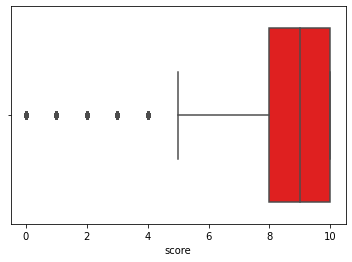

Boxplot of score
Q1 is :  8.0
Q2 is :  9.0
Q3 is :  10.0
IQR is : 2.0
Lower Whisker, Upper Whisker :  5.0 ,  13.0
number of outliers are :  147884


In [81]:


# only score is the column which is numeric so we check it for outliers.
# Checking for outliers in the sample of 1000000

sns.boxplot(x=d_df['score'], color = 'red')
plt.show()

print('Boxplot of score')

# calculating the outliers in attribute

Q1 = d_df['score'].quantile(0.25)
Q2 = d_df['score'].quantile(0.50)
Q3 = d_df['score'].quantile(0.75)

IQR = Q3 - Q1

L_W = (Q1 - 1.5 * IQR)
U_W = (Q3 + 1.5 * IQR)

print('Q1 is : ', Q1)
print('Q2 is : ', Q2)
print('Q3 is : ', Q3)
print('IQR is :', IQR)
print('Lower Whisker, Upper Whisker : ', L_W, ", ", U_W)
bools = (d_df['score'] < (Q1 - 1.5 * IQR)) | (d_df['score'] > (Q3 + 1.5 * IQR))

print('number of outliers are : ', bools.sum()) # calculating the number of outliers

       

There are 147884 outliers in the column score

In [83]:
# function to treat outliers
# Removing outliers by removing data below lower whisker and above upper whisker 

Q1 = d_df['score'].quantile(0.25)
Q2 = d_df['score'].quantile(0.75)
IQR = Q3 - Q1
d_df = d_df[(d_df['score'] > (Q1 - 1.5 * IQR)) & (d_df['score'] < (Q3 + 1.5 * IQR))]
bools = (d_df['score'] < (Q1 - 1.5 * IQR)) | (d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are : ', bools.sum()) # calculating the number of outliers

d_df.shape

number of outliers are :  0


(848829, 3)

In [84]:
# # Q9 - Try other techniques (Example: cross validation) to get better results.

cross_validate(algo, data_U, measures = ['RMSE'], cv = 3, verbose = False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([2.63727199, 2.6995982 , 2.52585261]),
 'fit_time': (0.41341590881347656, 0.41108107566833496, 0.3843052387237549),
 'test_time': (0.03836703300476074,
  0.020627737045288086,
  0.022257089614868164)}

# Q7 - Report your findings and inferences.

Samsung Galaxy Note5 is the most popular product Amazon Customer is the most active author who writes reviews. Lenovo Vibe K4 Note (White,16GB) was rated by most of the authors CV rmse was 2.5

### Q10 - In what business scenario you should use popularity based Recommendation Systems ?

Popularity based recommendation system relies on the popularity,trends and frequency counts of which items were most purchased.It is used buy the travel companies selling holiday packages in a season, by Google News and other news websites to show Top Stories with images.

### Q11 - In what business scenario you should use CF based Recommendation Systems ?

Collaborative Filtering is used to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected. It isa personalised recommender system , recommendations are made based on the past behaviour of the user. Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation system.

### Q12 - What other possible methods can you think of which can further improve the recommendation for different users ?

Apart from Popularity and Collaborative Filtering , Content-based, Demographic, Utility based, Knowledge based and Hybrid recommendation system can be used as per the user needs.